In [60]:
#Importing libraries
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
import numpy as np
import sdt.changepoint as c
import math

In [66]:
# create a dataframe from the csv file
dataframe = pd.read_csv('data.csv')

start_date = date(2021, 7, 15) 
og_start_date = date(2021, 7, 22)
og_end_date = date(2021, 8, 9)
end_date = date(2021, 8, 28)

difference = og_start_date - start_date

# filter dataframe from start_date to end_date
dataframe = dataframe[(dataframe['dateRep'] >= str(start_date)) & (dataframe['dateRep'] <= str(end_date))]

# filter data from 2021-07-16 to 2021-08-15
#dataframe = dataframe[(dataframe['date'] >= '2021-07-20') & (dataframe['date'] <= '2021-08-28')]



In [67]:
'''# partiziona il dataframe con soltanto gli iso_code che iniziano con "OWID_" e salvali in un nuovo dataframe
df_owid = dataframe[dataframe['iso_code'].str.startswith('OWID_')]

# per ogni iso_code all'interno del nuovo dataframe crea un plot con y positive_rate e x date
for iso_code in df_owid.index.get_level_values('iso_code').unique():
    plt.plot(df_owid[iso_code]['date'], df_owid[df_owid['iso_code'] == iso_code]['new_cases'])
    plt.title("Positive rate - " + df_owid[df_owid['iso_code'] == iso_code]['location'].unique()[0])
    plt.ylabel("new_cases")
    plt.xlabel("Date")
    plt.xticks(rotation=90)
    plt.show()'''

'# partiziona il dataframe con soltanto gli iso_code che iniziano con "OWID_" e salvali in un nuovo dataframe\ndf_owid = dataframe[dataframe[\'iso_code\'].str.startswith(\'OWID_\')]\n\n# per ogni iso_code all\'interno del nuovo dataframe crea un plot con y positive_rate e x date\nfor iso_code in df_owid.index.get_level_values(\'iso_code\').unique():\n    plt.plot(df_owid[iso_code][\'date\'], df_owid[df_owid[\'iso_code\'] == iso_code][\'new_cases\'])\n    plt.title("Positive rate - " + df_owid[df_owid[\'iso_code\'] == iso_code][\'location\'].unique()[0])\n    plt.ylabel("new_cases")\n    plt.xlabel("Date")\n    plt.xticks(rotation=90)\n    plt.show()'

In [68]:
# aggragate by iso_code and date and sum total_cases, total_deaths, population, total_vaccinations, new_cases, mind positive_rate, max positive_rate,KEEP LOCATION 
dataframe = dataframe.groupby(['iso_code', 'date']).agg({'total_cases': 'sum', 'total_deaths': 'sum', 'total_vaccinations': 'sum', 'new_cases': 'sum', 'positive_rate': 'max','population': 'sum', 'location': 'max'})

#rimuovi da dataframe tutte le righe che hanno positive_rate a nan o uguale a 0.0
#dataframe = dataframe.dropna(subset=['positive_rate'])
#dataframe = dataframe[dataframe['positive_rate'] != 0.0]

# crea una nuova colonna del dataframe con una moving avarege dei new_cases per ogni iso_code
dataframe['moving_average_new_cases'] = dataframe.groupby('iso_code')['new_cases'].transform(lambda x: x.rolling(window=7).mean())
# rimuovi tutte le righe che non hanno un valore o hanno un valore a "0.0" per moving_average_new_cases
dataframe = dataframe.dropna(subset=['moving_average_new_cases'])
dataframe = dataframe[dataframe['moving_average_new_cases'] != 0.0]

# save dataframe in csv file
dataframe.to_csv('./dataframe.csv')

iso_codes_europe = [ "ITA", "FRA", "DEU", "ESP", "GBR", "CHE", "NLD", "BEL", "AUT", "SWE", "NOR", "FIN", "GRC", "PRT", "DNK", "POL", "CZE", "HUN", "ROU", "BGR", "HRV", "SVK", "SVN", "IRL", "LUX", "EST", "LVA", "LTU", "MLT", "CYP", "ISL", "LIE", "AND", "MCO", "SMR", "VAT"]
# rimuovo da iso_cedes_europe tutti i codici che non sono presenti nel dataframe
iso_codes_europe = [iso_code for iso_code in iso_codes_europe if iso_code in dataframe.index.get_level_values('iso_code').unique()]

# per ogni iso_code stampa il plot di positive_rate
'''for iso_code in iso_codes_europe:
    plt.plot(dataframe.loc[iso_code]['new_cases'])
    plt.title("New cases - " + dataframe.loc[iso_code]['location'].unique()[0])
    plt.ylabel("new cases")
    plt.xlabel("Date")
    plt.xticks(rotation=90)
    plt.show()'''


'for iso_code in iso_codes_europe:\n    plt.plot(dataframe.loc[iso_code][\'new_cases\'])\n    plt.title("New cases - " + dataframe.loc[iso_code][\'location\'].unique()[0])\n    plt.ylabel("new cases")\n    plt.xlabel("Date")\n    plt.xticks(rotation=90)\n    plt.show()'

In [69]:
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

OUT [6]
 
0.9714 x + 9.571   [0 1 2 3 4 5 6]   range(0, 7)   #116530
 
2.717 x + 23.92   [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38]   range(6, 39)   #DB3F29


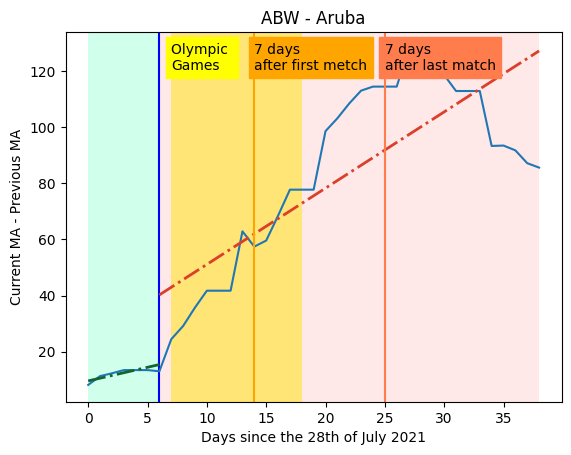

OUT [30]
 
-15.83 x + 642.1   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]   range(0, 31)   #116530
 
-2.429 x + 151.8   [30 31 32 33 34 35 36 37 38]   range(30, 39)   #DB3F29


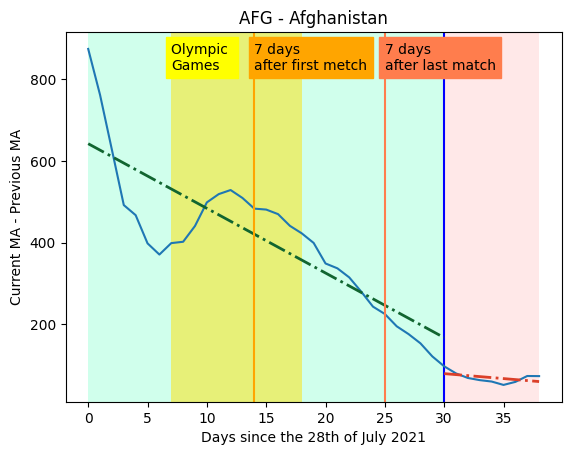

OUT [28]
 
-0.6163 x + 142.1   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]   range(0, 29)   #116530
 
4.138 x + 46.55   [28 29 30 31 32 33 34 35 36 37 38]   range(28, 39)   #DB3F29


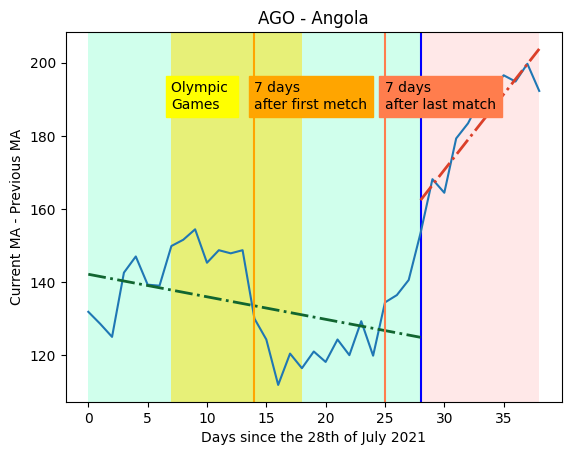

OUT [12]
 
-0.01349 x + 0.2527   [ 0  1  2  3  4  5  6  7  8  9 10 11 12]   range(0, 13)   #116530
 
0.2973 x - 2.441   [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28]   range(12, 29)   #DB3F29


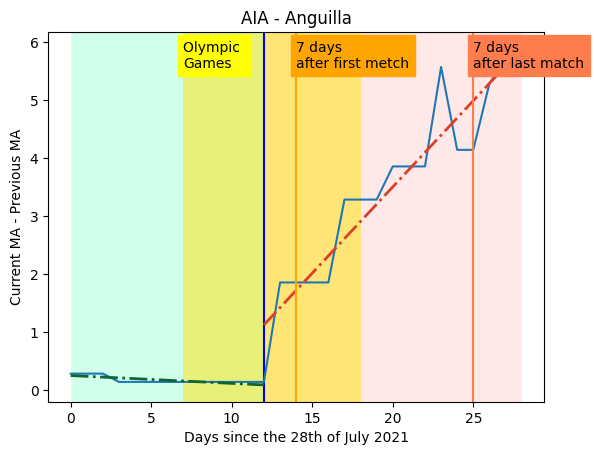

OUT [15]
 
1.22 x + 18.21   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
26.76 x - 418.5   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(15, 39)   #DB3F29


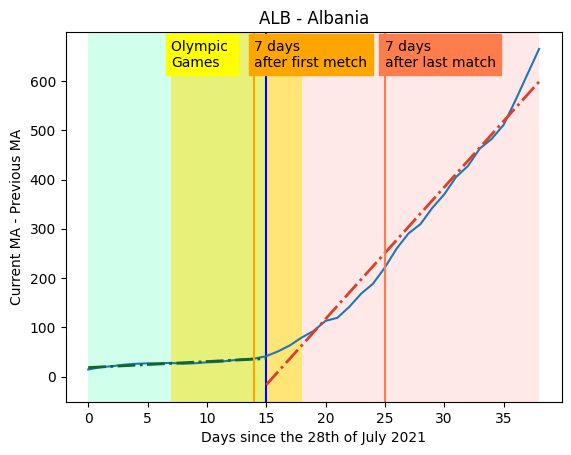

OUT [20]
 
-0.6026 x + 33.41   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]   range(0, 21)   #116530
 
-0.5669 x + 27.03   [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(20, 39)   #DB3F29


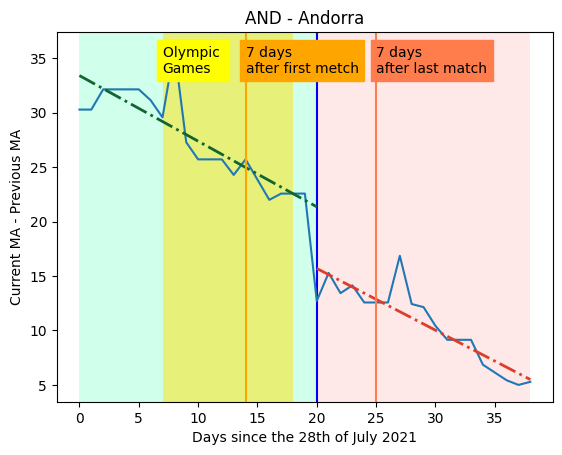

OUT [25]
 
-4.826 x + 1564   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]   range(0, 26)   #116530
 
-20.2 x + 1768   [25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(25, 39)   #DB3F29


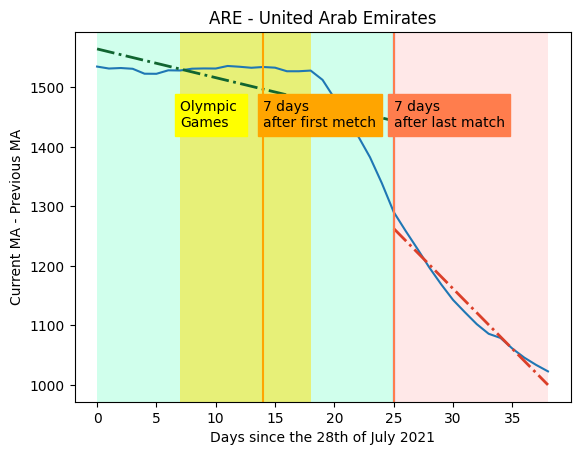

OUT [25]
 
-136.5 x + 1.351e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]   range(0, 26)   #116530
 
-179.4 x + 1.258e+04   [25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(25, 39)   #DB3F29


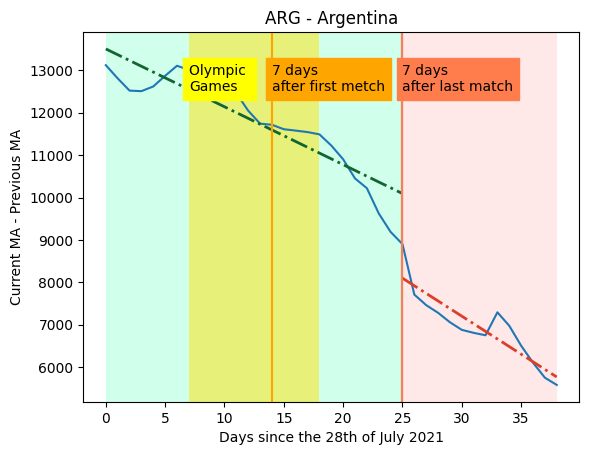

OUT [21]
 
4.924 x + 169.2   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]   range(0, 22)   #116530
 
13.99 x - 7.703   [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(21, 39)   #DB3F29


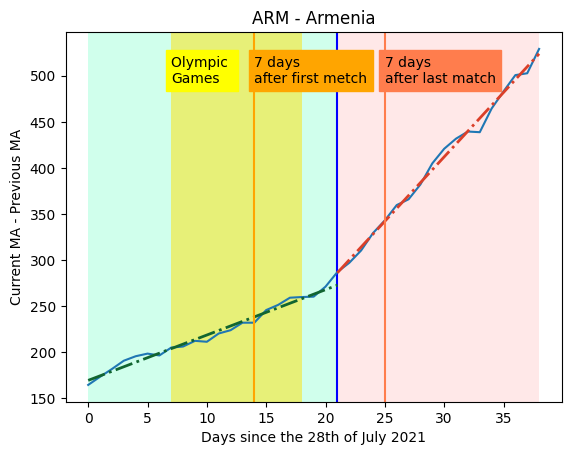

OUT [18]
 
0.1087 x + 1.322   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]   range(0, 19)   #116530
 
0.8994 x - 14.35   [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(18, 39)   #DB3F29


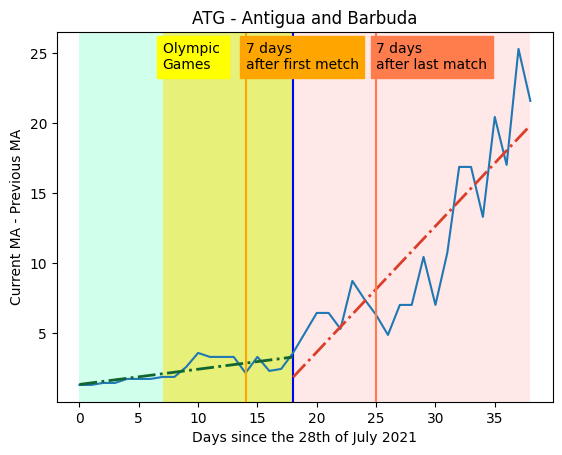

OUT [24]
 
9.861 x + 112   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]   range(0, 25)   #116530
 
40.64 x - 588.2   [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(24, 39)   #DB3F29


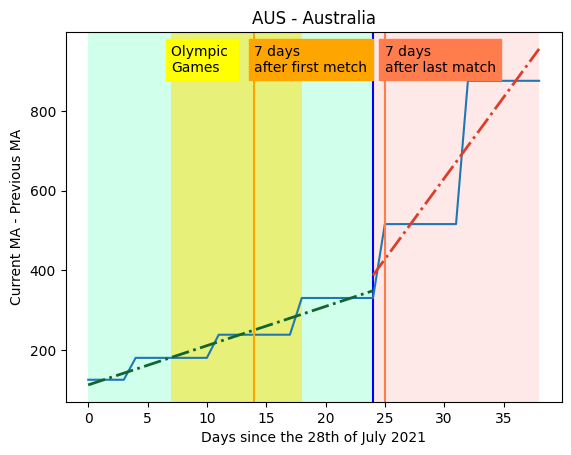

OUT [22]
 
10.26 x + 319.7   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]   range(0, 23)   #116530
 
44.74 x - 370   [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(22, 39)   #DB3F29


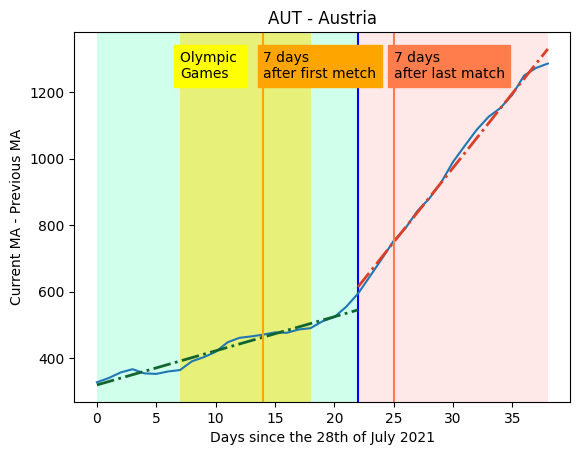

OUT [ 8 22]
 
20.23 x + 185.3   [0 1 2 3 4 5 6 7 8]   range(0, 9)   #116530
 
61.89 x - 143.2   [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]   range(8, 23)   #D7A449
 
140.4 x - 1394   [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(22, 39)   #DB3F29


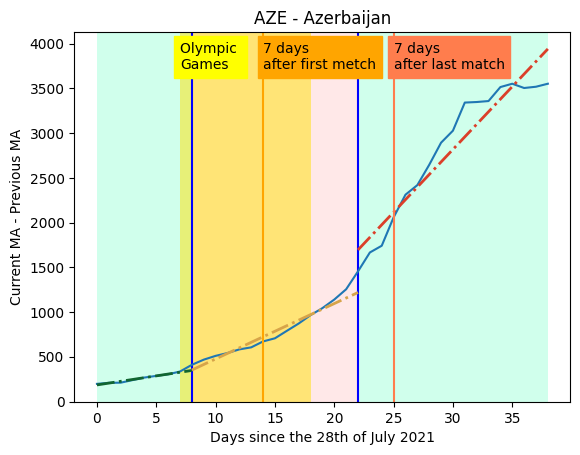

OUT [7]
 
11.66 x + 38.31   [0 1 2 3 4 5 6 7]   range(0, 8)   #116530
 
1.14 x + 144.1   [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38]   range(7, 39)   #DB3F29


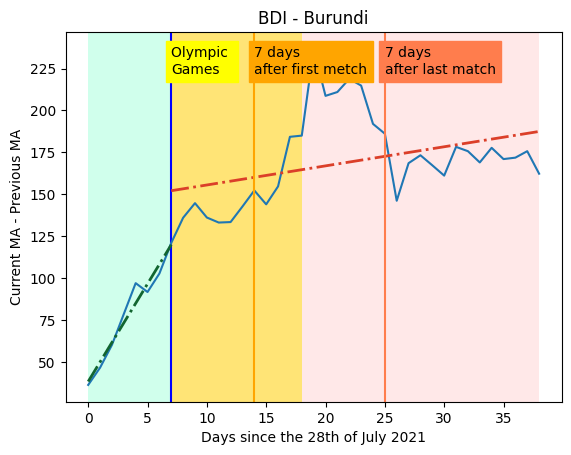

OUT [15]
 
13.6 x + 1415   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]   range(0, 16)   #116530
 
14.18 x + 1507   [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(15, 39)   #DB3F29


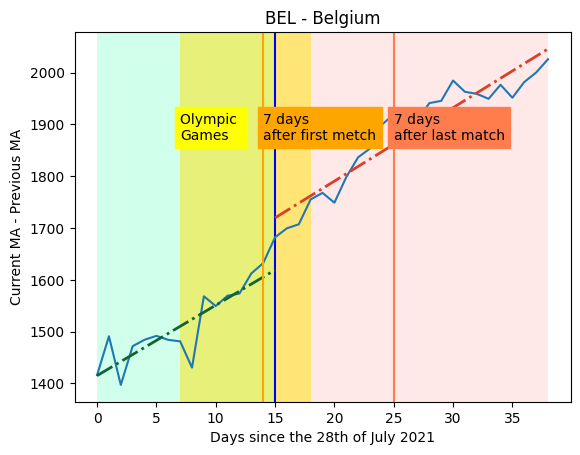

OUT [23]
 
2.628 x + 1.107   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]   range(0, 24)   #116530
 
20.02 x - 357.6   [23 24 25 26 27 28 29 30 31 32 33 34 35]   range(23, 36)   #DB3F29


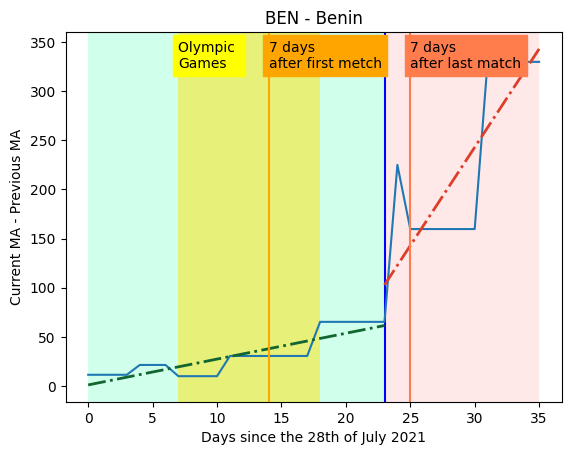

OUT [34]
 
0.04023 x + 2.139   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]   range(0, 35)   #116530
 
-0.01429 x + 1.914   [34 35 36 37 38]   range(34, 39)   #DB3F29


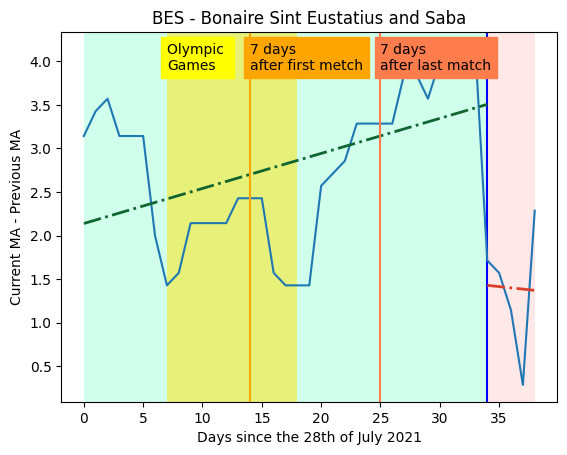

OUT [7]
 
0.2143 x + 0.7449   [0 1 2 3 4 5 6 7]   range(0, 8)   #116530
 
0.08536 x + 4.312   [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38]   range(7, 39)   #DB3F29


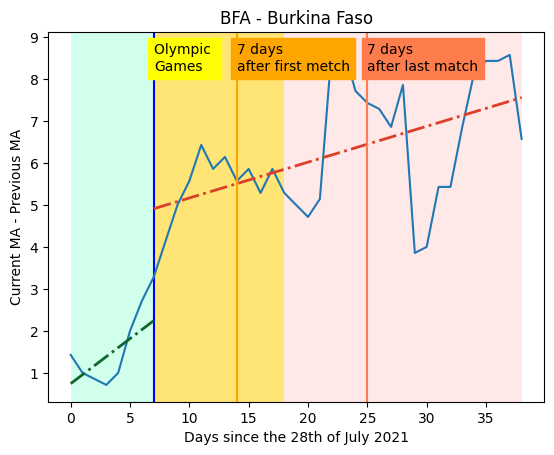

OUT [27]
 
27.52 x + 1.109e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]   range(0, 28)   #116530
 
-317.1 x + 1.646e+04   [27 28 29 30 31 32 33 34 35 36 37 38]   range(27, 39)   #DB3F29


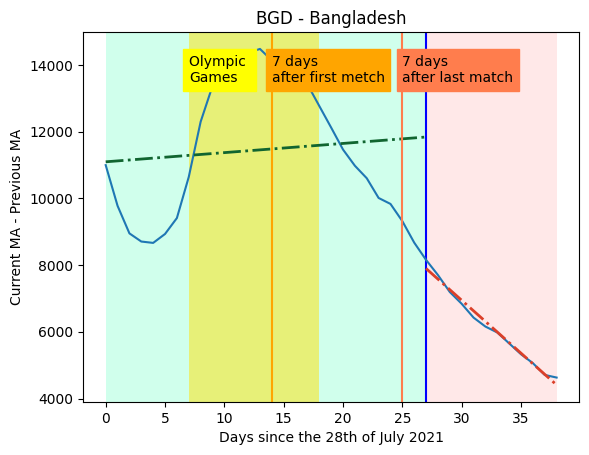

OUT [10]
 
4.468 x + 67.47   [ 0  1  2  3  4  5  6  7  8  9 10]   range(0, 11)   #116530
 
41.23 x - 390.1   [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38]   range(10, 39)   #DB3F29


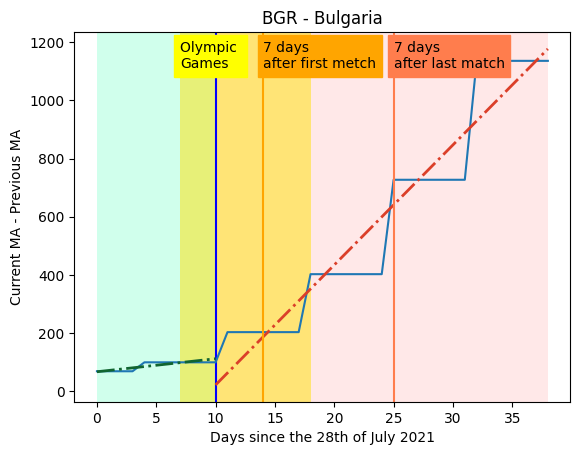

OUT [5]
 
0.05714 x + 86.97   [0 1 2 3 4 5]   range(0, 6)   #116530
 
0.005457 x + 108.6   [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38]   range(5, 39)   #DB3F29


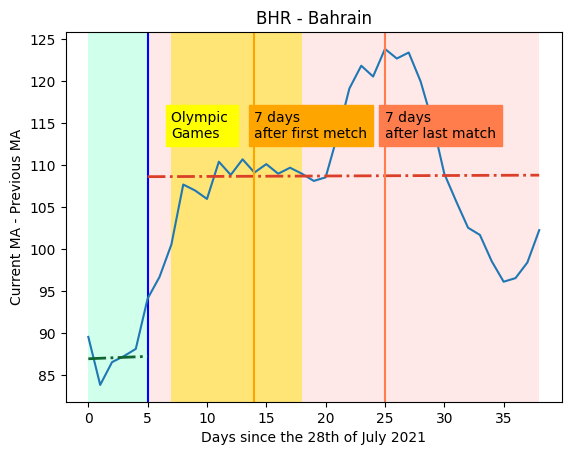

OUT [8]
 
3.735 x + 66.54   [0 1 2 3 4 5 6 7 8]   range(0, 9)   #116530
 
0.9316 x + 93.87   [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38]   range(8, 39)   #DB3F29


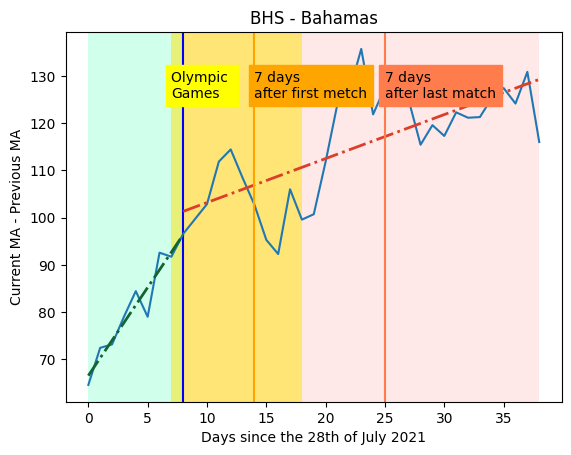

OUT [14]
 
2.012 x + 14.29   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]   range(0, 15)   #116530
 
17.47 x - 253.6   [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38]   range(14, 39)   #DB3F29


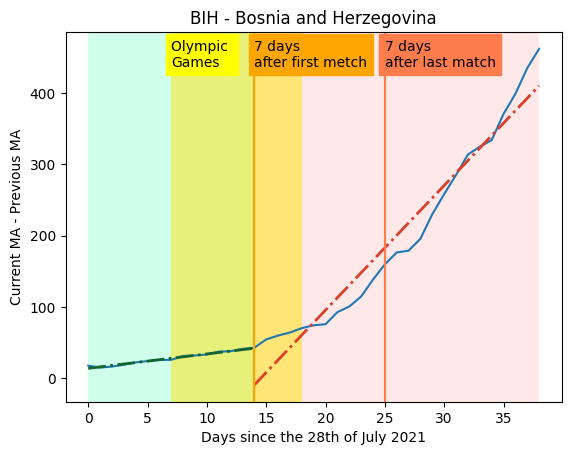

OUT [9]
 
0.06429 x + 0.7429   [0 1 2 3 4 5 6 7 8 9]   range(0, 10)   #116530
 
-1.122 x + 42.87   [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37]   range(9, 38)   #DB3F29


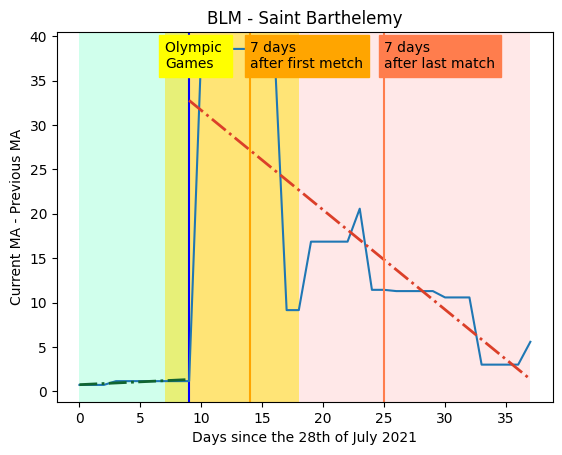

OUT [29]
 
5.662 x + 872.5   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]   range(0, 30)   #116530
 
26.47 x + 327.2   [29 30 31 32 33 34 35 36 37 38]   range(29, 39)   #DB3F29


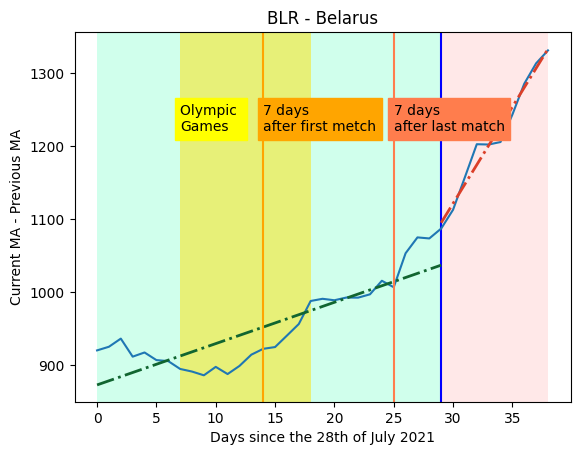

OUT [23]
 
0.4993 x + 29.6   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]   range(0, 24)   #116530
 
2.362 x - 0.01597   [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(23, 39)   #DB3F29


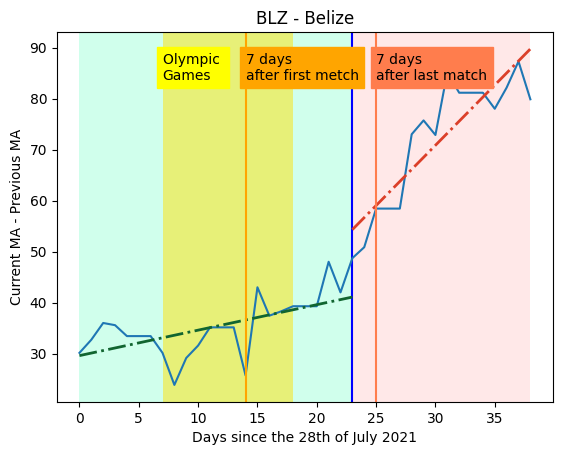

OUT [10]
 
0.05887 x + 1.192   [ 0  1  2  3  4  5  6  7  8  9 10]   range(0, 11)   #116530
 
0.3256 x + 0.4118   [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38]   range(10, 39)   #DB3F29


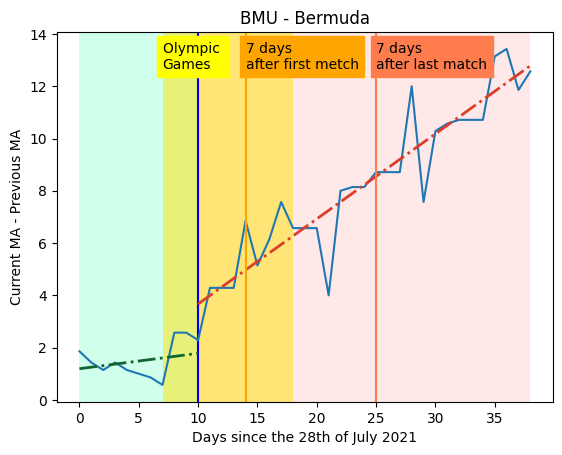

OUT [17]
 
-21.05 x + 1037   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]   range(0, 18)   #116530
 
-2.728 x + 679.4   [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(17, 39)   #DB3F29


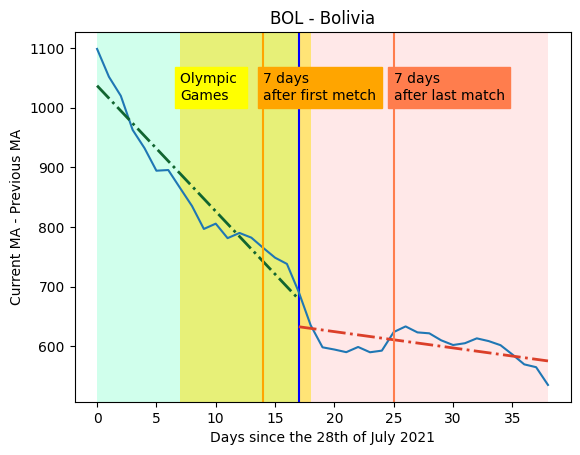

OUT [11]
 
870 x + 3.885e+04   [ 0  1  2  3  4  5  6  7  8  9 10 11]   range(0, 12)   #116530
 
-296.7 x + 3.835e+04   [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38]   range(11, 39)   #DB3F29


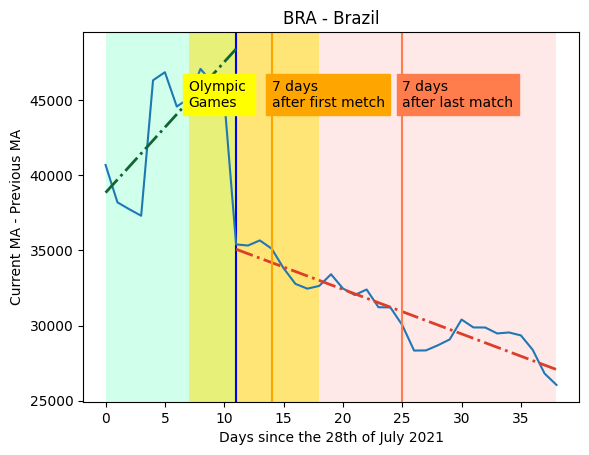

OUT [27]
 
-0.1454 x + 11.97   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]   range(0, 28)   #116530
 
0.4535 x + 0.2835   [27 28 29 30 31 32 33 34 35 36 37 38]   range(27, 39)   #DB3F29


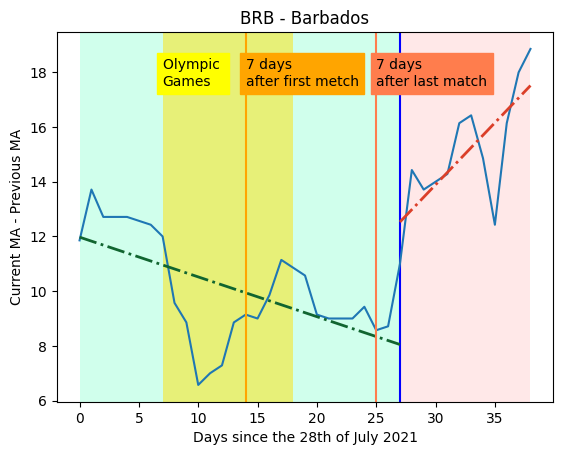

OUT [18]
 
-0.2621 x + 4.958   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]   range(0, 19)   #116530
 
9.131 x - 170.6   [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(18, 39)   #DB3F29


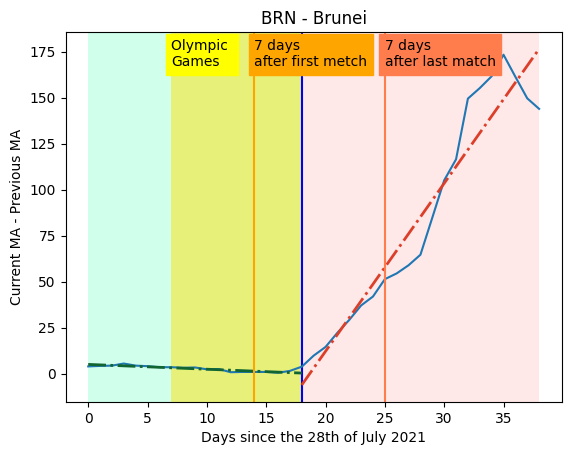

OUT [30]
 
-0.2676 x + 9.385   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]   range(0, 31)   #116530
 
-0.06905 x + 4.11   [30 31 32 33 34 35 36 37 38]   range(30, 39)   #DB3F29


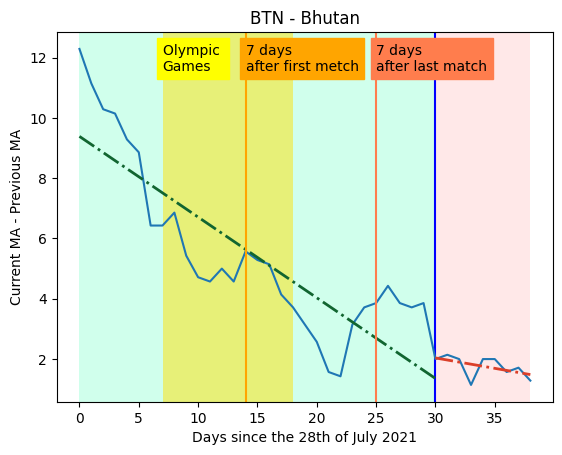

OUT [28]
 
20.51 x + 1520   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]   range(0, 29)   #116530
 
-49.45 x + 2800   [28 29 30 31 32 33 34 35 36 37 38]   range(28, 39)   #DB3F29


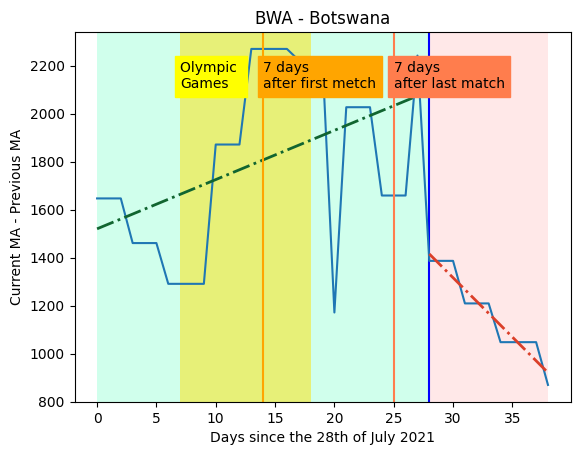

OUT [27]
 
0.05843 x + 5.029   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]   range(0, 28)   #116530
 
0.1159 x - 0.8139   [27 28 29 30 31 32 33 34 35 36 37 38]   range(27, 39)   #DB3F29


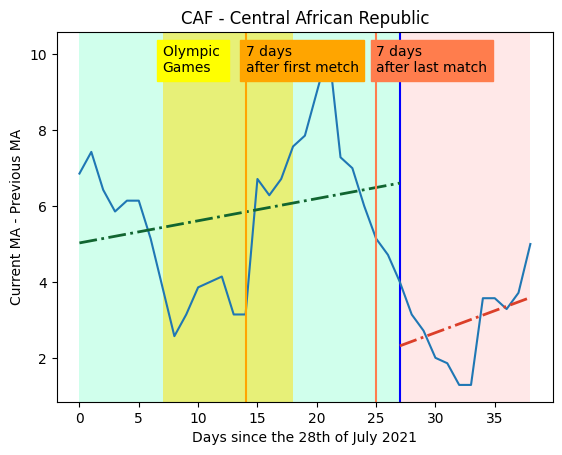

OUT [22]
 
42.19 x + 262.5   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]   range(0, 23)   #116530
 
85.59 x - 438.5   [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(22, 39)   #DB3F29


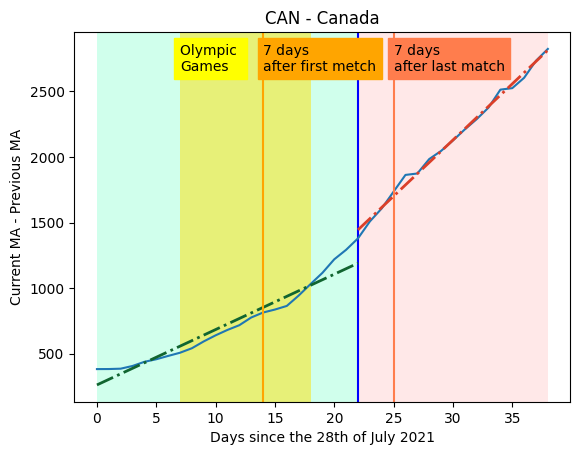

OUT [19]
 
17.72 x + 603.5   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]   range(0, 20)   #116530
 
80.22 x - 142   [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(19, 39)   #DB3F29


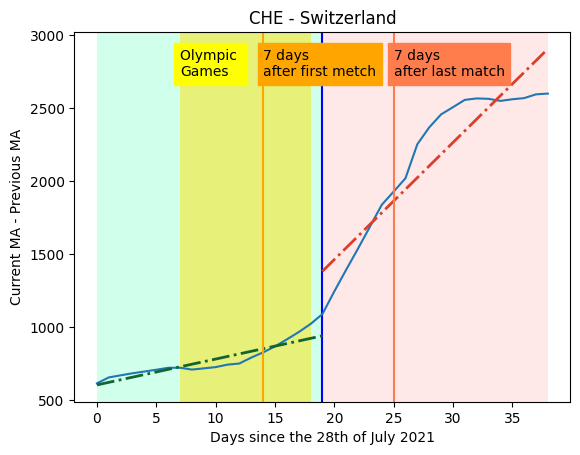

OUT [18]
 
-33.2 x + 1527   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]   range(0, 19)   #116530
 
-18.94 x + 1304   [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]   range(18, 39)   #DB3F29


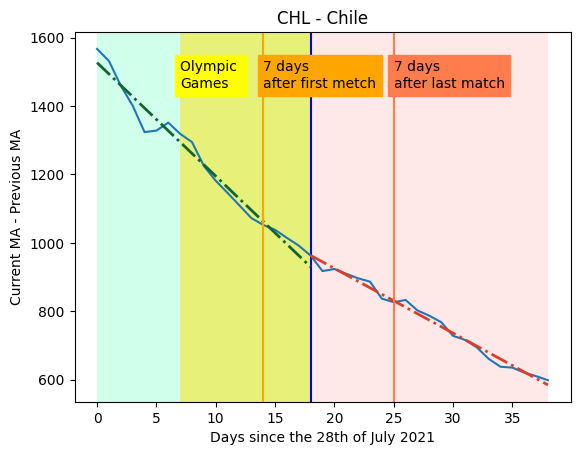

OUT [29]
 
1.487 x + 72.69   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]   range(0, 30)   #116530
 
-2.066 x + 114.1   [29 30 31 32 33 34 35 36 37 38]   range(29, 39)   #DB3F29


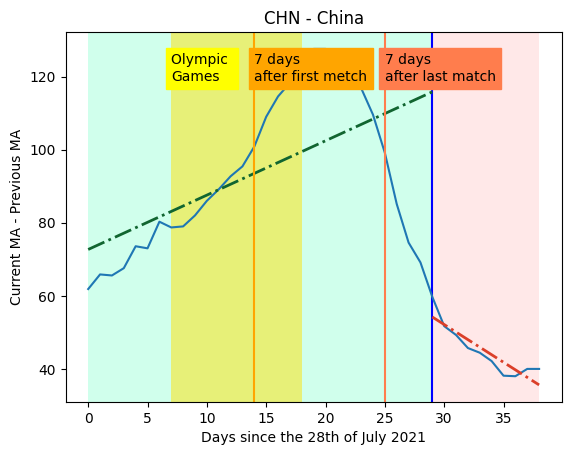

KeyboardInterrupt: 

In [70]:
#Change point detection with Bayesian Offline

BayesOffline = c.BayesOffline()
media_changepoint = 0.0
count_changepoint = 0.0
min_changepoint = (999,"error")
max_changepoint = (-1,"error")
save_me = []
tabella = pd.DataFrame(columns=['State','FirstSlope','SecondSlope','when'])

iso_codes = dataframe.index.get_level_values('iso_code').unique()

for code in iso_codes:
#for code in iso_codes_europe:
    # Out is a list of possible changepoint "indices"
    values = dataframe.loc[code]['moving_average_new_cases'].values

    prob = 0.9
    out = []
    plot_out = []
    
    while len(out) == 0:
        prob = prob * 0.9
        out = BayesOffline.find_changepoints(values, prob_threshold=prob)
    
    print("OUT", out)
    
    for i in out:
        media_changepoint += i
        count_changepoint += 1
        #find minimum and maximum of the changepoints with their state
        if i < min_changepoint[0]:
            min_changepoint = (i,code)
        if i > max_changepoint[0]:
            max_changepoint = (i,code)
        save_me.append((i,code))
    
    
    if len(out) == 1:
        i = out[0]
        zed = np.polyfit(range(0,i), values[:i], 1)
        p = np.poly1d(zed)
        zed2 = np.polyfit(range(i,len(values)), values[i:], 1)
        p2 = np.poly1d(zed2)
        plot_out = [[p,np.arange(0,i+1),range(0,i+1),"#116530"],[p2,np.arange(i,len(values)),range(i,len(values)),"#DB3F29"]]
        entry = pd.DataFrame.from_dict({"State": [code],'FirstSlope': [zed[0]],'SecondSlope': [zed2[0]],'when': [out[0]]})
    else:
        #plot three trends from two changepoints
        i = out[0]
        j = out[1]
        zed = np.polyfit(range(0,i), values[:i], 1)
        p = np.poly1d(zed)
        zed2 = np.polyfit(range(i,j), values[i:j], 1)
        p2 = np.poly1d(zed2)
        zed3 = np.polyfit(range(j,len(values)), values[j:], 1)
        p3 = np.poly1d(zed3)
        plot_out = [[p,np.arange(0,i+1),range(0,i+1),"#116530"],[p2,np.arange(i,j+1),range(i,j+1),"#D7A449"],[p3,np.arange(j,len(values)),range(j,len(values)),"#DB3F29"]]
        entry = pd.DataFrame.from_dict({"State": [code],'FirstSlope': [round_half_up(zed[0])],'SecondSlope': [round_half_up(zed2[0])],'ThirdSlope': [zed3[0]]})
    
    # Plot the data.
    for i in out:
        plt.axvline(x = i, color = 'blue', label = 'changepoint')
        
    c.plot_changepoints(values, out, segment_alpha=0.3,segment_colors=['#66ffc2', '#ffb3b3'])
    #c.plot_changepoints(values, out, segment_alpha=0.3)

    lw = 2
    tabella = pd.concat([tabella, entry], ignore_index=True)
    for p in plot_out:
        print(p[0]," ", p[1], " ", p[2], " ", p[3])
        plt.plot(p[1], p[0](p[2]), color=p[3], linewidth=lw, linestyle="dashdot")
    
    
    # Crea un plot con i punti di cambio colorati
    plt.title(code + " - " + dataframe.loc[code]['location'].unique()[0])
    plt.axvline(x = difference.days+7, color = 'orange', label = '7 days after first game of olympic games')
    plt.axvline(x = difference.days+18, color = '#FF7D4D', label = '7 days after last game of olympic games')
    plt.xlabel("Days since the 28th of July 2021")
    plt.ylabel("Current MA - Previous MA")
    #plt.legend()
    plt.axvspan(difference.days, difference.days+11, facecolor='#ffe206', alpha=0.5)
    ymax = plt.ylim()[1]
    plt.text(difference.days, ymax*0.9, "Olympic \nGames", rotation=0, color="black", backgroundcolor="yellow")
    plt.text(difference.days+7, ymax*0.9, "7 days \nafter first metch", rotation=0, backgroundcolor="orange")
    plt.text(difference.days+18, ymax*0.9, "7 days \nafter last match", rotation=0, backgroundcolor="#FF7D4D")
    
    #save the plot as a png file
    plt.savefig("./pictures/"+ code + "_changepoint" +".png")
    plt.show()

print("Media: " + str(media_changepoint/count_changepoint))
print("Count: " + str(count_changepoint))
print("Difference: " + str(difference.days))
print("Minimum: " + str(min_changepoint))
print("Maximum: " + str(max_changepoint))


In [ ]:
# Inizializza BayesOffline
BayesOffline = c.BayesOffline()

# Inizializza variabili di statistica
media_changepoint = 0.0
count_changepoint = 0
min_changepoint = (999, "error")
max_changepoint = (-1, "error")
save_me = []

# Crea un DataFrame vuoto per la tabella dei risultati
columns = ['State', 'FirstSlope', 'SecondSlope', 'when']
tabella = pd.DataFrame(columns=columns)

# Estrai iso_codes unici dal DataFrame
iso_codes = dataframe.index.get_level_values('iso_code').unique()

# Itera per ogni iso_code
for code in iso_codes:
    values = dataframe.loc[code]['moving_average_new_cases'].values
    
    prob = 0.9
    out = []
    plot_out = []
    
    # Trova i punti di cambio con BayesOffline
    while len(out) == 0:
        prob *= 0.9
        out = BayesOffline.find_changepoints(values, prob_threshold=prob)
    
    print("OUT", out)
    
    for i in out:
        media_changepoint += i
        count_changepoint += 1
        if i < min_changepoint[0]:
            min_changepoint = (i, code)
        if i > max_changepoint[0]:
            max_changepoint = (i, code)
        save_me.append((i, code))
    
    # Calcola le pendenze dei segmenti
    for i in range(len(out)):
        if len(out) == 1:
            zed = np.polyfit(range(0, out[i]), values[:out[i]], 1)
            p = np.poly1d(zed)
            zed2 = np.polyfit(range(out[i], len(values)), values[out[i]:], 1)
            p2 = np.poly1d(zed2)
            plot_out.append([p, np.arange(0, out[i] + 1), range(0, out[i] + 1), "#116530"])
            plot_out.append([p2, np.arange(out[i], len(values)), range(out[i], len(values)), "#DB3F29"])
            entry = pd.DataFrame.from_dict({"State": [code], 'FirstSlope': [zed[0]], 'SecondSlope': [zed2[0]], 'when': [out[i]]})
        else:
            j = out[i+1] if i < len(out)-1 else len(values)
            zed = np.polyfit(range(out[i], j), values[out[i]:j], 1)
            p = np.poly1d(zed)
            plot_out.append([p, np.arange(out[i], j), range(out[i], j), "#D7A449"])
            entry = pd.DataFrame.from_dict({"State": [code], 'FirstSlope': [round_half_up(zed[0])], 'when': [out[i]]})
        tabella = pd.concat([tabella, entry], ignore_index=True)
    
    # Plot dei punti di cambio e delle pendenze
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe.loc[code]['date'], values, label='Nuovi casi')
    for p in plot_out:
        plt.plot(p[1], p[0](p[2]), color=p[3], linewidth=2, linestyle="dashdot")
    
    plt.axvline(x=difference.days + 7, color='orange', label='7 giorni dopo il primo match olimpico')
    plt.axvline(x=difference.days + 18, color='red', label='7 giorni dopo l\'ultimo match olimpico')
    plt.axvspan(difference.days, difference.days + 11, facecolor='#E8D9C7', alpha=0.5)
    plt.xlabel("Giorni dal 28 luglio 2021")
    plt.ylabel("Media Mobile Attuale - Media Mobile Precedente")
    plt.title(code + " - " + iso_data['location'].unique()[0])
    plt.legend()
    plt.ylim(0)
    ymax = plt.ylim()[1]
    plt.text(difference.days, ymax * 0.9, "Giochi Olimpici", rotation=0, color="black", backgroundcolor="yellow")
    plt.text(difference.days + 7, ymax * 0.9, "7 giorni\ndopo il primo match", rotation=0, backgroundcolor="orange")
    plt.text(difference.days + 18, ymax * 0.9, "7 giorni\ndopo l'ultimo match", rotation=0, backgroundcolor="red")
    plt.savefig("./pictures/" + code + "_changepoint" + ".png")
    plt.show()

# Calcola statistiche finali
average_changepoint = media_changepoint / count_changepoint
print("Media: " + str(average_changepoint))
print("Conteggio: " + str(count_changepoint))
print("Differenza: " + str(difference.days))
print("Minimo: " + str(min_changepoint))
print("Massimo: " + str(max_changepoint))
